# Loading data and packages
Loading in Python packages and fashion MNIST dataset

In [1]:
# Importing necessary packages
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
from functools import partial

In [2]:
# Loading in fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Setting font sizes for plotting
axis_font = {'size':'16'}
title_font = {'weight':'bold','size':'20'}

In [3]:
# Creating and normalizing validation set
y_valid = y_train_full[:5000]
X_valid = X_train_full[:5000]/255.0

# Normalizing training and testing datasets
y_train = y_train_full[5000:]
X_train = X_train_full[5000:]/255.0

X_test = X_test/255.0

# Setting list of class names (instead of numbers)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

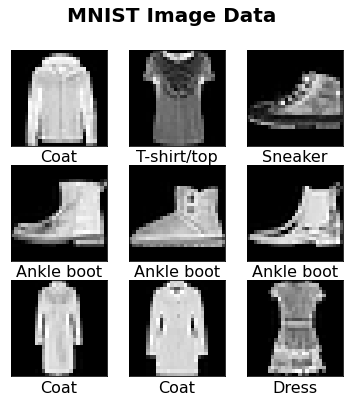

In [4]:
# Plotting the first 9 images and classes
# Of the fashion MNIST dataset
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap="gray")
    plt.xlabel(class_names[y_train[i]], **axis_font)
plt.suptitle('MNIST Image Data', **title_font)
plt.show()

# Fully-Connected Neural Network Classifier
Run the cells to load necessary data and packages first. Creates and evaluates a fully-connected neural network.

In [5]:
# Setting seed for RNG 
tf.random.set_seed(1)

# Creating fully-connected neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [6]:
# Compiling model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

In [7]:
# Training model and reporting/recording accuracy information
history = model.fit(X_train, y_train,
          epochs=13, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/13
55000/55000 [==============================] - 5s 99us/sample - loss: 0.4920 - accuracy: 0.8245 - val_loss: 0.3786 - val_accuracy: 0.8670
Epoch 2/13
55000/55000 [==============================] - 5s 88us/sample - loss: 0.3710 - accuracy: 0.8657 - val_loss: 0.3384 - val_accuracy: 0.8794
Epoch 3/13
55000/55000 [==============================] - 5s 89us/sample - loss: 0.3311 - accuracy: 0.8784 - val_loss: 0.3132 - val_accuracy: 0.8888
Epoch 4/13
55000/55000 [==============================] - 4s 75us/sample - loss: 0.3053 - accuracy: 0.8888 - val_loss: 0.3112 - val_accuracy: 0.8850
Epoch 5/13
55000/55000 [==============================] - 5s 82us/sample - loss: 0.2882 - accuracy: 0.8937 - val_loss: 0.3275 - val_accuracy: 0.8808
Epoch 6/13
55000/55000 [==============================] - 4s 80us/sample - loss: 0.2729 - accuracy: 0.8988 - val_loss: 0.3256 - val_accuracy: 0.8792
Epoch 7/13
55000/55000 [==============================] -

In [8]:
# Evaluating model on test data
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.3310 - accuracy: 0.8897


[0.33099962385892867, 0.8897]

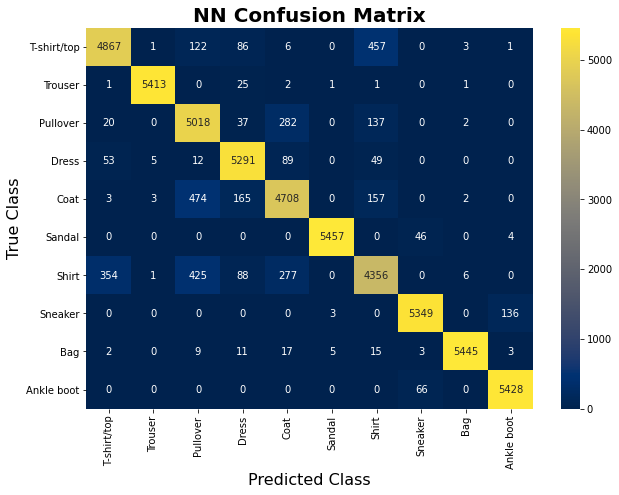

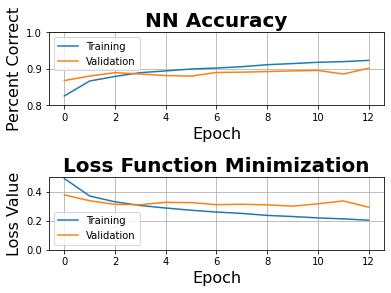

In [26]:
# Finding predicted classes for training data based on model
y_pred = model.predict_classes(X_train)

# Creating confusion matrix and dataframe
conf_mat_train = confusion_matrix(y_train, y_pred)
df_conf_mat = pd.DataFrame(conf_mat_train, index=[i for i in class_names],
                  columns=[i for i in class_names])

# Plotting confusion matrix
plt.figure(figsize=(10,7))
sn.heatmap(df_conf_mat, annot=True, fmt='d', cmap='cividis')
plt.xticks(rotation=90) 
plt.ylabel('True Class', **axis_font)
plt.xlabel('Predicted Class', **axis_font)
plt.title('NN Confusion Matrix', **title_font)
plt.show()

# Plotting training and validation accuracies
fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(history.history['accuracy'], label='Training')
ax1.plot(history.history['val_accuracy'], label='Validation')
ax1.grid(True)
ax1.set_ylabel('Percent Correct', **axis_font)
ax1.set_xlabel('Epoch', **axis_font)
ax1.set_title('NN Accuracy', **title_font)
ax1.legend()
ax1.set_ylim(0.8,1)

ax2.plot(history.history['loss'], label='Training')
ax2.plot(history.history['val_loss'], label='Validation')
ax2.grid(True)
ax2.set_ylabel('Loss Value', **axis_font)
ax2.set_xlabel('Epoch', **axis_font)
ax2.set_title('Loss Function Minimization', **title_font)
ax2.legend()
ax2.set_ylim(0,0.5)
plt.subplots_adjust(hspace=1)


# Convolutional Neural Network Classifier
Run the cells to load necessary data and packages first. Creates and evaluates a convolutional neural network.

In [27]:
# Adding additional axis to data for CNN processing
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [28]:
# Setting a seed for RNG
tf.random.set_seed(1)

# Creating default convolutional and pooling layers
conv_layer = partial(tf.keras.layers.Conv2D, padding="valid",
                     activation="relu", kernel_initializer='he_uniform')

# Creating CNN model
model = tf.keras.models.Sequential([
    conv_layer(32,3,padding="same",input_shape=[28,28,1]),
    tf.keras.layers.AveragePooling2D(2, strides=2),
    conv_layer(16,3),
    tf.keras.layers.AveragePooling2D(2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu",
                          kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [29]:
# Compiling model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

In [30]:
# Training model and reporting/recording accuracy information
history = model.fit(X_train, y_train,
          epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 23s 416us/sample - loss: 0.4852 - accuracy: 0.8232 - val_loss: 0.3551 - val_accuracy: 0.8758
Epoch 2/10
55000/55000 [==============================] - 22s 409us/sample - loss: 0.3281 - accuracy: 0.8819 - val_loss: 0.2855 - val_accuracy: 0.8968
Epoch 3/10
55000/55000 [==============================] - 25s 455us/sample - loss: 0.2781 - accuracy: 0.8974 - val_loss: 0.2564 - val_accuracy: 0.9088
Epoch 4/10
55000/55000 [==============================] - 25s 452us/sample - loss: 0.2458 - accuracy: 0.9086 - val_loss: 0.2404 - val_accuracy: 0.9126
Epoch 5/10
55000/55000 [==============================] - 24s 435us/sample - loss: 0.2255 - accuracy: 0.9161 - val_loss: 0.2249 - val_accuracy: 0.9194
Epoch 6/10
55000/55000 [==============================] - 25s 461us/sample - loss: 0.2078 - accuracy: 0.9229 - val_loss: 0.2324 - val_accuracy: 0.9166
Epoch 7/10
55000/55000 [=====================

In [31]:
# Evaluating model on test data
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 131us/sample - loss: 0.2266 - accuracy: 0.9200


[0.22658269753456114, 0.92]

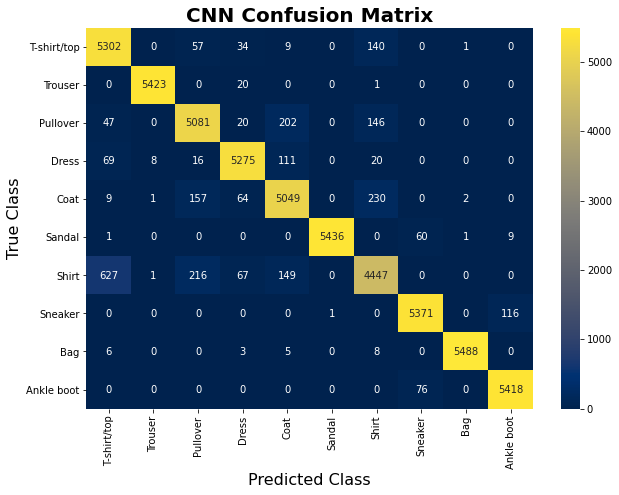

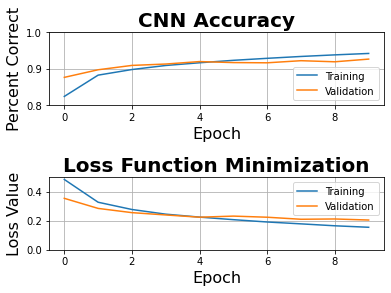

In [32]:
# Finding predicted classes for training data based on model
y_pred = model.predict_classes(X_train)

# Creating confusion matrix and dataframe
conf_mat_train = confusion_matrix(y_train, y_pred)
df_conf_mat = pd.DataFrame(conf_mat_train, index=[i for i in class_names],
                  columns=[i for i in class_names])

# Plotting confusion matrix
plt.figure(figsize=(10,7))
sn.heatmap(df_conf_mat, annot=True, fmt='d', cmap='cividis')
plt.xticks(rotation=90) 
plt.ylabel('True Class', **axis_font)
plt.xlabel('Predicted Class', **axis_font)
plt.title('CNN Confusion Matrix', **title_font)
plt.show()

# Plotting training and validation accuracies
fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(history.history['accuracy'], label='Training')
ax1.plot(history.history['val_accuracy'], label='Validation')
ax1.grid(True)
ax1.set_ylabel('Percent Correct', **axis_font)
ax1.set_xlabel('Epoch', **axis_font)
ax1.set_title('CNN Accuracy', **title_font)
ax1.legend()
ax1.set_ylim(0.8,1)

ax2.plot(history.history['loss'], label='Training')
ax2.plot(history.history['val_loss'], label='Validation')
ax2.grid(True)
ax2.set_ylabel('Loss Value', **axis_font)
ax2.set_xlabel('Epoch', **axis_font)
ax2.set_title('Loss Function Minimization', **title_font)
ax2.legend()
ax2.set_ylim(0,0.5)
plt.subplots_adjust(hspace=1)